### importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Processing the training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/CNN/Flower Classification/flowers/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3458 images belonging to 5 classes.


### Processing the test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/CNN/Flower Classification/flowers/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 859 images belonging to 5 classes.


In [5]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

### Build the CNN

In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

### Training the CNN

In [7]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

#### Training the CNN on the training set and evaluating it on test set

In [9]:
fitted_model = cnn.fit(x = training_set,
                       steps_per_epoch = int(3458/32),
                       epochs = 25,
                       validation_data = test_set,
                       validation_steps = int(859/32))

Epoch 1/25
108/108 [==============================] - 993s 9s/step - loss: 1.3475 - accuracy: 0.3908 - val_loss: 1.2027 - val_accuracy: 0.4808
Epoch 2/25
108/108 [==============================] - 25s 233ms/step - loss: 1.1179 - accuracy: 0.5374 - val_loss: 1.1706 - val_accuracy: 0.5445
Epoch 3/25
108/108 [==============================] - 25s 232ms/step - loss: 1.0152 - accuracy: 0.5966 - val_loss: 1.1545 - val_accuracy: 0.5733
Epoch 4/25
108/108 [==============================] - 26s 238ms/step - loss: 0.9603 - accuracy: 0.6223 - val_loss: 1.0854 - val_accuracy: 0.5769
Epoch 5/25
108/108 [==============================] - 26s 242ms/step - loss: 0.8818 - accuracy: 0.6600 - val_loss: 1.0252 - val_accuracy: 0.6142
Epoch 6/25
108/108 [==============================] - 25s 232ms/step - loss: 0.8291 - accuracy: 0.6745 - val_loss: 1.0228 - val_accuracy: 0.5950
Epoch 7/25
108/108 [==============================] - 25s 232ms/step - loss: 0.7830 - accuracy: 0.6970 - val_loss: 1.0168 - val_accu

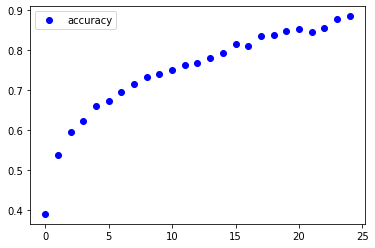

In [10]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')

plt.legend()

### Making a single prediction

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/CNN/Flower Classification/flowers/sample/5.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
training_set.class_indices

[[1. 0. 0. 0. 0.]]


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}